In [1]:
import luwiji
luwiji.__version__

'1.2.1'

In [2]:
from luwiji.neural_network import illustration, demo

### Sample Data 

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

# Step 1: Dataset & Dataloader 

In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [11]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [15]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32)

In [17]:
iterator = iter(trainloader)
iterator.next()

[tensor([[0.7221, 0.4469, 0.3315, 0.4743],
         [0.3067, 0.2099, 0.1778, 0.2434],
         [0.7686, 0.5672, 0.7154, 0.6501],
         [0.3895, 0.5978, 0.9342, 0.7075],
         [0.9741, 0.9342, 0.3307, 0.7297],
         [0.4983, 0.9447, 0.5217, 0.8067],
         [0.2783, 0.1281, 0.2569, 0.2915],
         [0.6512, 0.1131, 0.1025, 0.4428],
         [0.4265, 0.1292, 0.7530, 0.4357],
         [0.7010, 0.8766, 0.8216, 0.5132],
         [0.8056, 0.4886, 0.7681, 0.5644],
         [0.1975, 0.6643, 0.5068, 0.3441],
         [0.6303, 0.0684, 0.7112, 0.8163],
         [0.7889, 0.4599, 0.5784, 0.4269],
         [0.0616, 0.6928, 0.1547, 0.4249],
         [0.6606, 0.1055, 0.8983, 0.2131],
         [0.2482, 0.8977, 0.7105, 0.9101],
         [0.3345, 0.2013, 0.8240, 0.6789],
         [0.5077, 0.3105, 0.6490, 0.1734],
         [0.1078, 0.9690, 0.6268, 0.4548],
         [0.6444, 0.8179, 0.2005, 0.9660],
         [0.7677, 0.1338, 0.7564, 0.0183],
         [0.3829, 0.6373, 0.0595, 0.3852],
         [0

# Step 2: Build Architecture

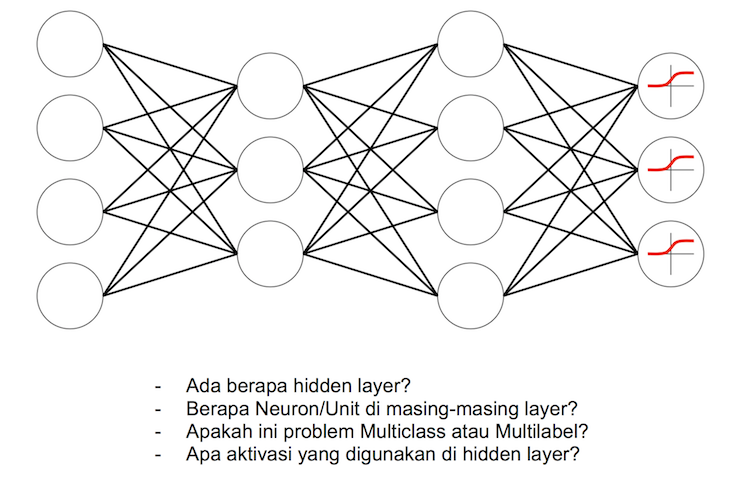

In [18]:
illustration.quiz

In [19]:
from torch import nn

In [36]:
nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
    
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# Step 3: Training Prep -> MCO 

## Model 

In [24]:
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
    
)

## Criteon 

In [28]:
criterion = nn.MSELoss() # modoel diakhiri Linear --> untuk regresi
criterion = nn.NLLLoss() # model diakhiri oleh logsoftmax
criterion = nn.BCELoss() # model diakhiri sigmoid -> binary clf, multilabel clf

## Optimizer 

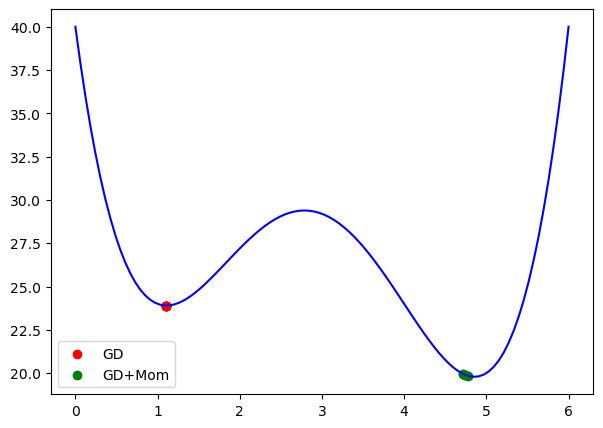

In [29]:
demo.momentum()

In [30]:
from torch import optim

In [31]:
optimizer = optim.AdamW(model.parameters(), lr=0.010)

In [40]:
from jcopdl.optim import RAdam, Ranger, RangerLARS, Ralamb 
## Ranger and RangerLARS is quite better wira said

# Step 4: Training Loop

In [33]:
epochs = 500
for i in range(epochs):
    model.train()
    for feature, target in trainloader:
        output = model(feature) #feedforward
        loss = criterion(output, target) # calculate loss
        loss.backward() # backprop

        optimizer.step() #update weight
        optimizer.zero_grad()
    print(f'\rEpoch: {i+1}/{epochs}', end=" ")

Epoch: 500/500 

In [37]:
epochs = 500
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) #feedforward
        loss = criterion(output, target) # calculate loss
        loss.backward() # backprop

        optimizer.step() #update weight
        optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    
    train_cost.append(cost / len(train_set))
        
    print(f'\rEpoch: {i+1}/{epochs:4} | train_cost: {train_cost[-1]:.4f}', end=" ")

Epoch: 500/ 500 | train_cost: 0.6912 

In [38]:
import matplotlib.pyplot as plt

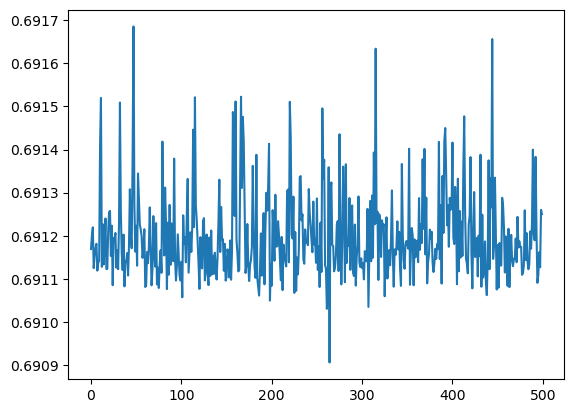

In [39]:
plt.plot(train_cost)